In [1]:
output_dir = "output/"
# run.py
from mesa.batchrunner import BatchRunner

from ecosystem.model import EcoModel

# fixed_params = {"width": 50,
#                 "height": 50,
#                 "b": 0.5,
#                 "m": 0.1}

# variable_params = {"b": range(0, 1, 2)}

# batch_run = BatchRunner(EcoModel,
#                         fixed_parameters=fixed_params,
#                         variable_parameters=None,  
#                         iterations=5,
#                         max_steps=100)
# batch_run.run_model()

In [2]:
from ecosystem.model import EcoModel
from mesa.datacollection import DataCollector
import time
start_time = time.time()

# fixed_params = {"width": 50,
#                 "height": 50,
#                 "b": 0.5,
#                 "m": 0.1}

model = EcoModel(0.4, 0.1, "ecosystem/config_file.json")

for i in range(50):
    model.step()
    
print(time.time()-start_time)

Vegetated: 9054
Empty: 1709
Degraded: 115
Vegetated: 8176
Empty: 2414
Degraded: 134
Vegetated: 7452
Empty: 2903
Degraded: 154
Vegetated: 6943
Empty: 3281
Degraded: 212
Vegetated: 6507
Empty: 3626
Degraded: 248
Vegetated: 6126
Empty: 3883
Degraded: 305
Vegetated: 5812
Empty: 4095
Degraded: 363
Vegetated: 5542
Empty: 4352
Degraded: 391
Vegetated: 5257
Empty: 4451
Degraded: 462
Vegetated: 5087
Empty: 4574
Degraded: 524
Vegetated: 4902
Empty: 4700
Degraded: 559
Vegetated: 4741
Empty: 4819
Degraded: 606
Vegetated: 4575
Empty: 4873
Degraded: 665
Vegetated: 4462
Empty: 4986
Degraded: 686
Vegetated: 4328
Empty: 5051
Degraded: 731
Vegetated: 4218
Empty: 5132
Degraded: 784
Vegetated: 4084
Empty: 5193
Degraded: 843
Vegetated: 3964
Empty: 5231
Degraded: 946
Vegetated: 3823
Empty: 5317
Degraded: 969
Vegetated: 3714
Empty: 5373
Degraded: 993
Vegetated: 3634
Empty: 5346
Degraded: 1088
Vegetated: 3566
Empty: 5341
Degraded: 1187
Vegetated: 3472
Empty: 5371
Degraded: 1190
Vegetated: 3439
Empty: 5426
Deg

In [3]:
stats = model.datacollector.get_model_vars_dataframe()
stats

,Degraded,Empty,Vegetated,qplusminus,qplusplus
0,503,443,9054,0.905756,0.905953
1,115,1709,8176,0.905500,0.906617
2,134,2414,7452,0.809341,0.821357
3,154,2903,6943,0.736652,0.750612
4,212,3281,6507,0.682871,0.702628
5,248,3626,6126,0.634446,0.663810
6,305,3883,5812,0.589750,0.633044
7,363,4095,5542,0.558547,0.605332
8,391,4352,5257,0.529469,0.581605
9,462,4451,5087,0.501348,0.558040


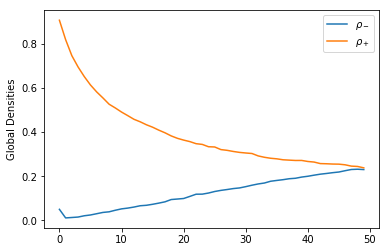

In [4]:
# Figure 3a 
# Plot the global densities at each time step

from matplotlib import pyplot as plt
total = (stats.Degraded+stats.Vegetated+stats.Empty)
plt.plot(stats.Degraded/(total), label = r'$\rho_-$')
plt.plot(stats.Vegetated/(total), label = r'$\rho_+$')
plt.legend()
plt.ylabel('Global Densities')
plt.savefig(output_dir+"Global_densities.png", format = 'png' )
plt.show()

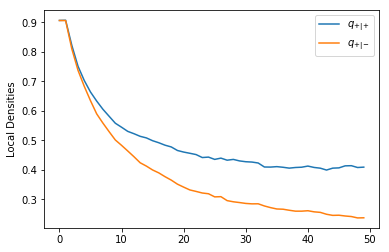

In [5]:
# Plot local densities
# q+|+ number of vegetated neighbours of vegetates sites
# q-|+ number of vegetated neighbours of degraded sites

from matplotlib import pyplot as plt

plt.plot(stats.qplusplus, label = r'$q_{+|+}$')
plt.plot(stats.qplusminus, label = r'$q_{+|-}$')
plt.legend()
plt.ylabel('Local Densities')
plt.savefig(output_dir + "Local_densities.png", format = 'png' )
plt.show()



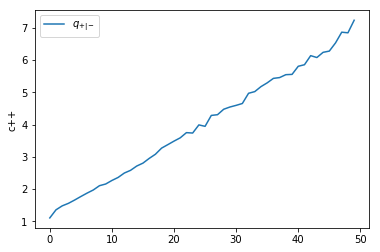

In [6]:
from matplotlib import pyplot as plt
plt.plot(stats.qplusplus/(stats.Vegetated/(total))**2, label = r'$q_{+|-}$')
plt.legend()
plt.ylabel('c++')
plt.savefig(output_dir + "Local_densities.png", format = 'png' )
plt.show()
